In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Criação dos modelos a serem utilizados nas questões

In [2]:
class LinearRegression():

    def plot_mse(self):
        '''
        cria um grafico contabilizando os erros do modelo ao longo das épocas do modelo
        '''
        erros = self.erros
        
        norma = np.linalg.norm(erros)
        erros_normalizados = erros/norma

        plt.plot(erros_normalizados)
        plt.xlabel('iteraçao')
        plt.ylabel('mse')
        plt.title('mse ao longo das iteracoes')
        plt.show()


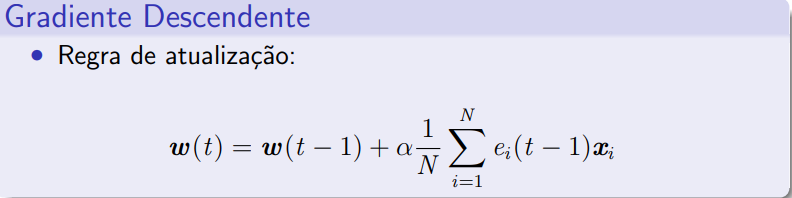

In [3]:
class GradientDescendent(LinearRegression):
    def __init__(self, alfa, t = None):
        '''
        cria o modelo do tipo GradientDescendent
        alfa(positive float): tamanho do passo em cada iteração, recomenda-se um valor pequeno
        t(int, optional): número de passos
        '''
        self.alfa = alfa

        if t == None:
            self.t = 500
        else:
            self.t = t

    def fit(self, x_train, y_train):
        '''
        faz o modelo se adequar ao conjunto de dados de treino
        x(np.array): array com o x do conjunto de dados
        y_true(np.array): valores verdadeiros de y do conjunto de dados
        '''
        #adcionando coluna de uns na esquerda de x_train
        x = np.hstack((np.ones((x_train.shape[0], 1)), x_train.copy().reshape(-1, 1)))

        #criando o vetor w
        w = np.zeros((1,x.shape[1])).ravel()
        #lista de erros 
        lista_erros = []
        y_pred = np.zeros((x.shape[0]))
        erro = np.array([0.0]*x.shape[0])
        for j in range (self.t):
            for i in range(x.shape[0]):
                #calcular os y_preditos pelo modelo
                y_pred[i] = np.dot(w.T, x[i])
                #calcular os erros do modelo
                erro[i] = (y_train[i] - y_pred[i]).astype(float)
            for coluna in range(x.shape[1]):
                #regra de atualização
                w[coluna] = w[coluna] + self.alfa*(1/x.shape[0])*np.sum(np.dot(erro , x[:,coluna]))
            #lista de erros, para futuras analises
            lista_erros.append(np.sum(erro)) 
        self.w = w
        self.erros = lista_erros

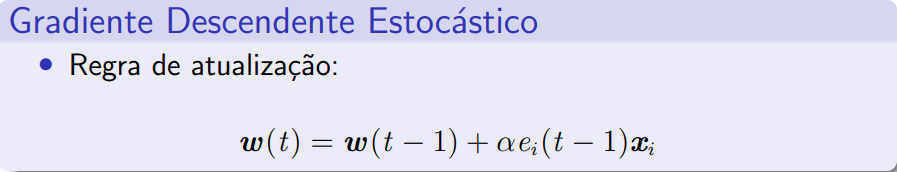

Infelizmente não consegui fazer o SGD dessa forma, no entanto fica aqui o código da tentativa. Abaixo dele, o código do sgd simples.

In [ ]:
class StochasticGradientDescent(LinearRegression):
    def __init__(self, alfa, t = None):
        '''
        cria o modelo do tipo StochaticGradientDescendent
        alfa(positive float): tamanho do passo em cada iteração, recomenda-se um valor pequeno
        t(int, optional): número de passos
        lamb(floar, optional): fator de regularizacao do modelo
        '''
        self.alfa = alfa

        if t == None:
            self.t = 500
        else:
            self.t = t

    def fit(self, x_train, y_train):
       #adcionando coluna de uns na esquerda de x_train
        x = np.hstack((np.ones((x_train.shape[0], 1)), x_train.copy().reshape(-1, 1)))
        #criando o vetor w
        w = np.zeros((1,x.shape[1])).ravel()
        #lista de erros 
        y_train_copy = y_train.copy()
        lista_erros = []
        y_pred = np.zeros((x.shape[0]))
        erro = np.array([0.0]*x.shape[0])
        count = 0
        alfa = np.float64(self.alfa)
        #embaralhar aleatoriamente os dados        
        while count < self.t:
            x,y_train_copy = embaralhar(x, y_train_copy)
            for index in range(x.shape[0]): 
                #calcula o erro   
                y_pred[index] = np.dot(w.T, x[index])
                erro[index] = y_train[index] - y_pred[index]
                
                errinho = erro[index]
                #atualiza os parametros
                for coluna in range(x.shape[1]):
                    temp = x[index,coluna]
                    w[coluna] = w[coluna] + (alfa*errinho*temp) 
                    
                lista_erros.append(np.sum(erro))
                count += 1
        
        self.w = w
        self.erros = lista_erros 


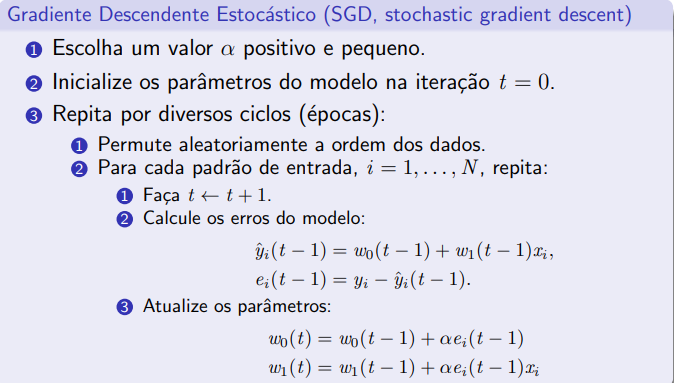

In [4]:
class SGD(LinearRegression):
    def __init__(self, alfa, t) :
        '''
        cria o modelo do tipo StochaticGradientDescendent
        alfa(positive float): tamanho do passo em cada iteração, recomenda-se um valor pequeno
        t(int, optional): número de passos
        lamb(floar, optional): fator de regularizacao do modelo
        '''
        self.alfa = alfa

        if t == None:
            self.t = 500
        else:
            self.t = t
            
    def fit(self, x_train, y_train):
        def obter_mse(w0,w1,x,y):
            y_temp = w0 + w1*x
            temp = y - y_temp
            aa = temp **2
            s = np.mean(aa)
            return s
            
        w0 = 0
        w1 = 0
        alfa = np.float64(self.alfa)
        lista_erros = []
        
        y_train_copy = y_train.copy()
        x_train_copy = x_train.copy()
        count = 0
        while count < self.t:
            perm = np.random.permutation(len(x_train))
            x_perm = x_train_copy[perm]
            y_perm = y_train_copy[perm] 
            for i in range(x_train.shape[0]):
                if count <self.t:
                # Atualize a previsão antes de calcular o erro
                    y_pred = w0 + w1 * x_perm[i]
                    erro = y_perm[i] - y_pred
                    # Atualize os parâmetros
                    w0 = w0 + alfa * erro
                    w1 = w1 + alfa * erro * x_perm[i]
                    lista_erros.append(obter_mse(w0,w1,x_train, y_train))
                    count += 1
        self.w0 = w0
        self.w1 = w1
        self.erros = lista_erros


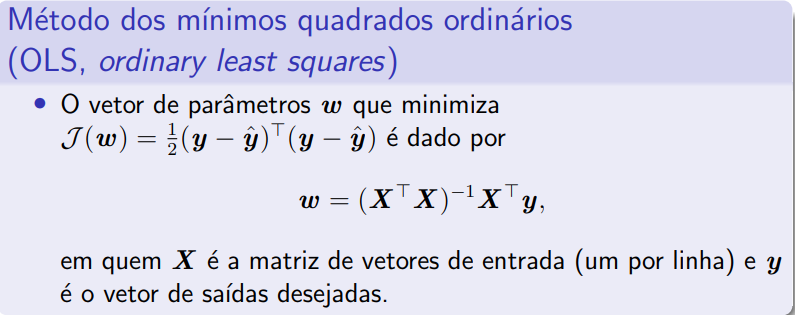

In [5]:
class OLS(LinearRegression):
    def fit(self, x_train, y_train):
        x = np.hstack((np.ones((x_train.shape[0], 1)), x_train.copy().reshape(-1, 1)))
        a = np.dot(x.T, x)
        b = np.linalg.inv(a)
        c = np.dot(b,x.T)
        w = np.dot(c, y_train)
        self.w = w

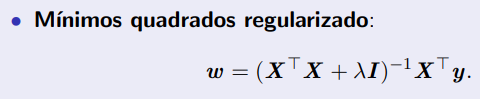

In [6]:
class OLS_reg():
    def __init__(self,lambd, grau):
        self.lambd = lambd
        self.grau = grau

    def predict(self,x_test):
        x = self.transform(x_test)
        W = self.w
        y_pred = np.dot (x, W) 
        self.pred = y_pred
        return y_pred
    
    def transform(self, data):
            grau = self.grau 
            if grau == 1:
                return data
            num_colunas = data.shape[1]
            novo_data = np.empty((data.shape[0], num_colunas * grau + 1))
            novo_data[:, :num_colunas] = data
            for i in range(num_colunas):
                for j in range(2, grau + 1):
                    novo_data[:, num_colunas * (j - 1) + i] = data[:, i] ** j
            novo_data[:, -1] = 1 
            return novo_data

    def fit(self, x_train, y_train):
        #x = np.hstack((np.ones((x_train.shape[0], 1)), x_train.copy()))
        #x = np.column_stack((np.ones(x_train.shape[0])))
        x = x_train.copy()
        a = np.dot(x.T,x)
        b = np.linalg.inv(a + np.identity(n = a.shape[0])*self.lambd)
        c = np.dot(b, x.T)
        w = np.dot(c, y_train)
        self.w = w

    def fit_transform(self, x, y):
        a = self.transform(x)
        self.fit(a,y)
        


# 1a questão

In [8]:
def funcao_linear(x, w0, w1):
    return w0 + w1 * x

def obter_mse(w0,w1,x,y):
            y_temp = w0 + w1*x
            temp = y - y_temp
            aa = temp **2
            s = np.mean(aa)
            return s

data = pd.read_csv('artificial1d.csv')
x = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])



## item a, modelo OLS

In [9]:
modelo_ols = OLS()
modelo_ols.fit(x,y)
print(modelo_ols.w)
print(obter_mse(modelo_ols.w[0], modelo_ols.w[1], x,y))

[0.08956111 1.51328267]
0.20771235894617687


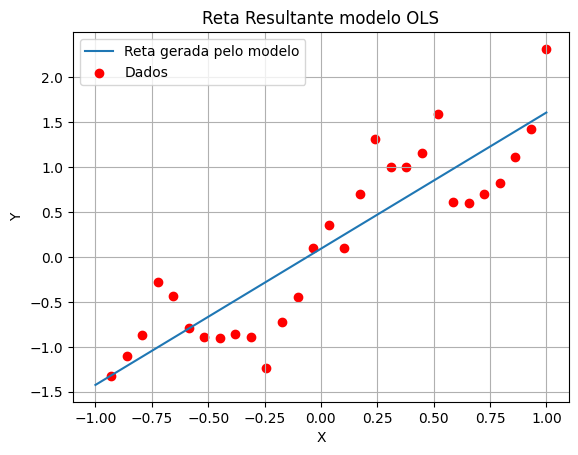

In [10]:
x = np.linspace(-1, 1, 100)
y = funcao_linear(x, modelo_ols.w[0], modelo_ols.w[1])
pontos_destacados_x = np.array(data.iloc[:,0])
pontos_destacados_y = np.array(data.iloc[:,1])
plt.plot(x, y, label='Reta gerada pelo modelo')
plt.scatter(pontos_destacados_x, pontos_destacados_y, color='red', label='Dados')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reta Resultante modelo OLS')
plt.legend()
plt.grid(True)
plt.show()

## item b, modelo GD

[0.08956111 1.51289695]
5.0594017069216527e-08


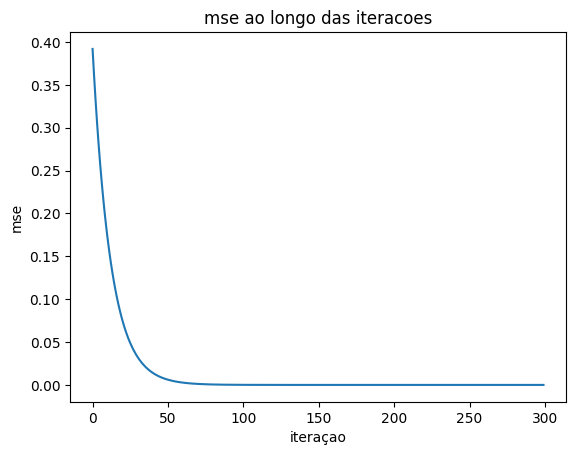

In [11]:
modelo_gradiente = GradientDescendent(alfa = 0.08, t =300)

modelo_gradiente.fit(x,y)
print(modelo_gradiente.w)
print(obter_mse(modelo_gradiente.w[0], modelo_gradiente.w[1], x,y))

modelo_gradiente.plot_mse()

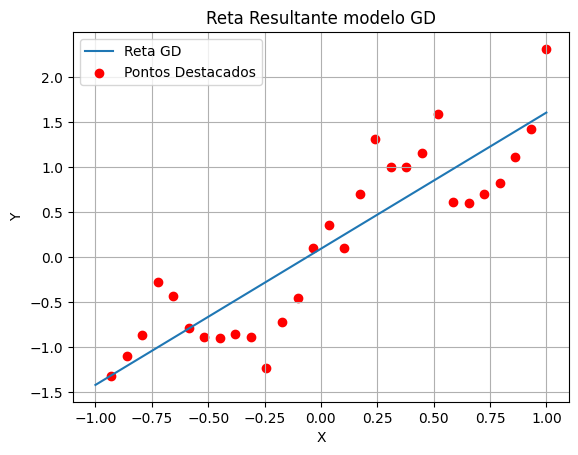

In [12]:
x = np.linspace(-1, 1, 100)
y = funcao_linear(x, modelo_gradiente.w[0], modelo_gradiente.w[1])
pontos_destacados_x = np.array(data.iloc[:,0])
pontos_destacados_y = np.array(data.iloc[:,1])
plt.plot(x, y, label='Reta GD')
plt.scatter(pontos_destacados_x, pontos_destacados_y, color='red', label='Pontos Destacados')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reta Resultante modelo GD')
plt.legend()
plt.grid(True)
plt.show()


## item c, modelo SGD

[0.0895614  1.51289554]
0.0


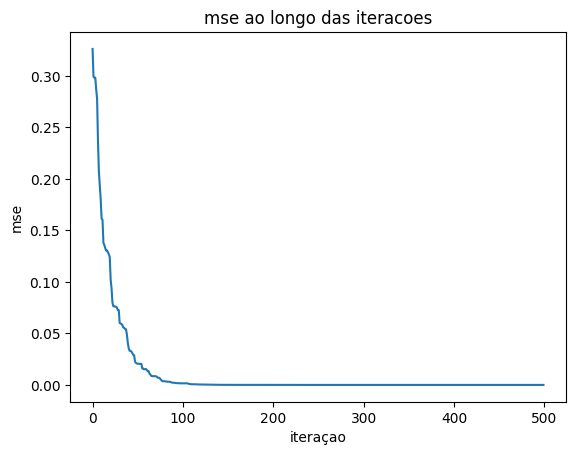

In [13]:
modelo_sgd = SGD(alfa = 0.08, t = 500)
modelo_sgd.fit(x,y)
w = np.array([modelo_sgd.w0, modelo_sgd.w1])
print(w)
print(obter_mse(modelo_gradiente.w[0], modelo_gradiente.w[1], x,y))
modelo_sgd.plot_mse()

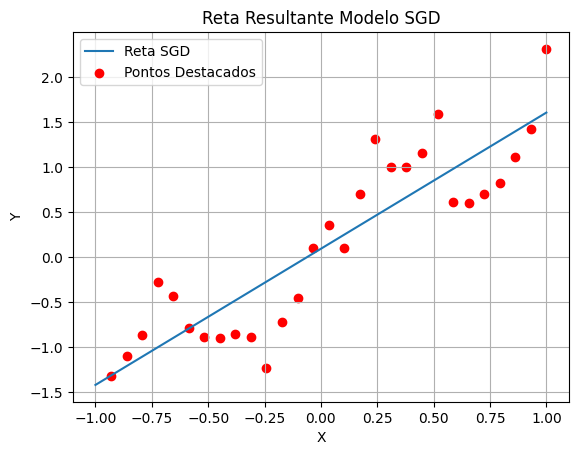

In [14]:
x = np.linspace(-1, 1, 100)
y = funcao_linear(x, modelo_sgd.w0, modelo_sgd.w1)
pontos_destacados_x = np.array(data.iloc[:,0])
pontos_destacados_y = np.array(data.iloc[:,1])
plt.plot(x, y, label='Reta SGD')
plt.scatter(pontos_destacados_x, pontos_destacados_y, color='red', label='Pontos Destacados')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reta Resultante Modelo SGD')
plt.legend()
plt.grid(True)
plt.show()

# 2a questão

## item a, divisao treino e teste

In [15]:
data_2 = pd.read_csv('california.csv')
data_2 = data_2.sample(frac = 1, random_state= 42)
count = 0
for index, row in data_2.iterrows():
    count += 1
    if count > (len(data_2)*0.8 -1):
        break
train = data_2[0:count]
test = data_2[count:]
x_train = np.array(train.iloc[:,:8])
y_train = np.array(train.iloc[:,8:9])
x_test = np.array(test.iloc[:,:8])
y_test = np.array(test.iloc[:,8:9])


minmax = MinMaxScaler()
stand = StandardScaler()
x_train = minmax.fit_transform(x_train)
y_train = stand.fit_transform(y_train)

## itens B e C, 13 modelos polinomiais vindo de 1 a 13 e seus RMSE

In [16]:
def rmse(y_pred, y_true):
    mse = np.mean((y_pred-y_true)**2)
    return np.sqrt(mse)

RMSE TREINO E TESTE

In [17]:
lista_rmse_treino = []
lista_rmse_teste = []

for i in range(1,14):
    print(f'Grau do polinomio: {i}')
    modelo = OLS_reg(lambd=0,  grau = i)
    modelo.fit_transform(x_train, y_train)
    pred_treino = modelo.predict(x_train)
    predito = modelo.predict(x_test)
    y_train_denormalizado = stand.inverse_transform(y_train)
    pred_desnormalizado_treino = stand.inverse_transform(pred_treino)
    pred_desnormalizado_teste = stand.inverse_transform(predito)

    rmse_treino = rmse(pred_desnormalizado_treino, y_train_denormalizado)
    print(f'rmse do modelo treino: {rmse_treino}')
    rmse_teste = rmse(pred_desnormalizado_teste, y_test)
    print(f'rmse do modelo teste: {rmse_teste}\n')
    lista_rmse_teste.append(rmse_teste)
    lista_rmse_treino.append(rmse_treino)

Grau do polinomio: 1
rmse do modelo treino: 0.6781392815581818
rmse do modelo teste: 2120.298910255756

Grau do polinomio: 2
rmse do modelo treino: 0.634235257180941
rmse do modelo teste: 7798347.0295331245

Grau do polinomio: 3
rmse do modelo treino: 0.6121813736704893
rmse do modelo teste: 120164990292.74704

Grau do polinomio: 4
rmse do modelo treino: 0.6025336768614
rmse do modelo teste: 2.3382048391126916e+16

Grau do polinomio: 5
rmse do modelo treino: 0.5922423338173888
rmse do modelo teste: 9.892774888396105e+20

Grau do polinomio: 6
rmse do modelo treino: 0.5849733548310684
rmse do modelo teste: 3.846236261971598e+26

Grau do polinomio: 7
rmse do modelo treino: 0.5781943802445757
rmse do modelo teste: 8.799883127423366e+30

Grau do polinomio: 8
rmse do modelo treino: 0.5755146904916154
rmse do modelo teste: 1.7510687184367043e+36

Grau do polinomio: 9
rmse do modelo treino: 0.5745761262730317
rmse do modelo teste: 3.645181000328029e+41

Grau do polinomio: 10
rmse do modelo tre

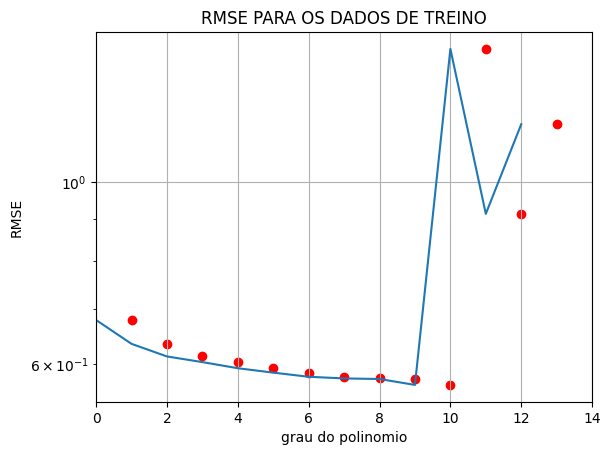

In [18]:
# Criar um gráfico de linha
plt.plot(lista_rmse_treino)
a = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.scatter(a, lista_rmse_treino, color = 'red', label = 'rmse')

plt.yscale('log')
# Adicionar rótulos aos eixos
plt.xlabel('grau do polinomio')
plt.ylabel('RMSE')
plt.title('RMSE PARA OS DADOS DE TREINO')
plt.xlim(0,14)
plt.grid(True)
plt.show()

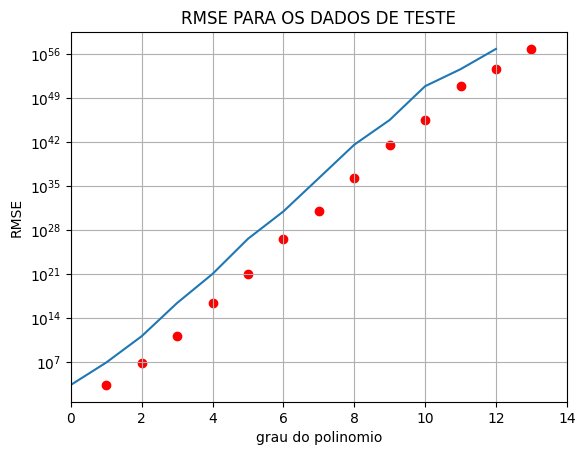

In [19]:
# Criar um gráfico de linha
plt.plot(lista_rmse_teste)
a = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.scatter(a, lista_rmse_teste, color = 'red', label = 'rmse')
plt.yscale('log')
# Adicionar rótulos aos eixos
plt.xlabel('grau do polinomio')
plt.ylabel('RMSE')
plt.xlim(0,14)
plt.title('RMSE PARA OS DADOS DE TESTE')
plt.grid(True)
plt.show()

## item d, repetir os procedimentos usando regularização L2 com lambda = 0.001

In [20]:
lista_rmse_treino2 = []
lista_rmse_teste2 = []

for i in range(1,14):
    print(f'Grau do polinomio: {i}')
    modelo = OLS_reg(lambd=0.001,  grau = i)
    modelo.fit_transform(x_train, y_train)
    pred_treino = modelo.predict(x_train)
    predito = modelo.predict(x_test)
    y_train_denormalizado = stand.inverse_transform(y_train)
    pred_desnormalizado_treino = stand.inverse_transform(pred_treino)
    pred_desnormalizado_teste = stand.inverse_transform(predito)

    rmse_treino = rmse(pred_desnormalizado_treino, y_train_denormalizado)
    print(f'rmse do modelo treino: {rmse_treino}')
    rmse_teste = rmse(pred_desnormalizado_teste, y_test)
    print(f'rmse do modelo teste: {rmse_teste}\n')
    lista_rmse_teste2.append(rmse_teste)
    lista_rmse_treino2.append(rmse_treino)

Grau do polinomio: 1
rmse do modelo treino: 0.6781393862842519
rmse do modelo teste: 2119.847910652764

Grau do polinomio: 2
rmse do modelo treino: 0.6342411791062001
rmse do modelo teste: 7848434.684302547

Grau do polinomio: 3
rmse do modelo treino: 0.6135242136925482
rmse do modelo teste: 124249782266.25128

Grau do polinomio: 4
rmse do modelo treino: 0.6103341691964894
rmse do modelo teste: 2030721207342542.0

Grau do polinomio: 5
rmse do modelo treino: 0.6093267130064267
rmse do modelo teste: 2.805348963355665e+19

Grau do polinomio: 6
rmse do modelo treino: 0.607260897809649
rmse do modelo teste: 2.3932878647956013e+23

Grau do polinomio: 7
rmse do modelo treino: 0.6045140932945935
rmse do modelo teste: 1.801233835835257e+27

Grau do polinomio: 8
rmse do modelo treino: 0.6024928760032607
rmse do modelo teste: 1.3207372914304128e+31

Grau do polinomio: 9
rmse do modelo treino: 0.6013513928475751
rmse do modelo teste: 9.742729349120787e+34

Grau do polinomio: 10
rmse do modelo trei

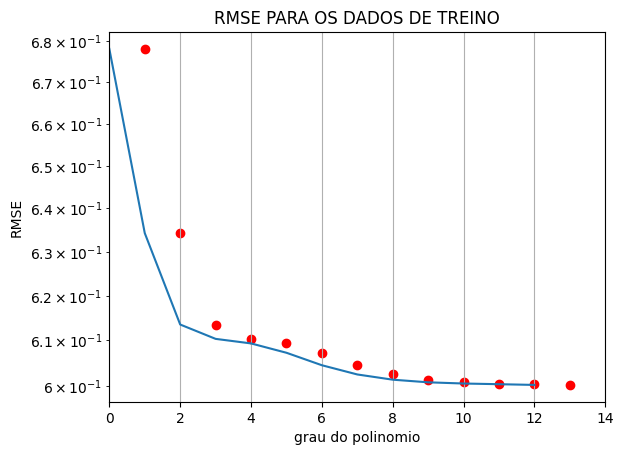

In [22]:
# Criar um gráfico de linha
plt.plot(lista_rmse_treino2)
a = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.scatter(a, lista_rmse_treino2, color = 'red', label = 'rmse')
# Adicionar rótulos aos eixos
plt.xlabel('grau do polinomio')
plt.ylabel('RMSE')
plt.yscale('log')

plt.title('RMSE PARA OS DADOS DE TREINO')
plt.xlim(0,14)
plt.grid(True)
plt.show()

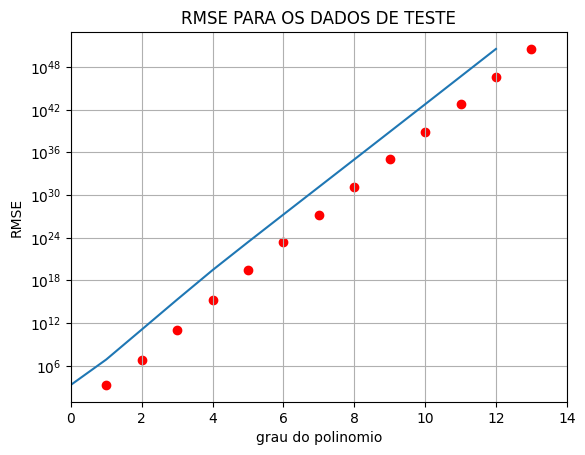

In [21]:
plt.plot(lista_rmse_teste2)
a = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.scatter(a, lista_rmse_teste2, color = 'red', label = 'rmse')
plt.xlabel('grau do polinomio')
plt.ylabel('RMSE')

plt.yscale('log')

plt.title('RMSE PARA OS DADOS DE TESTE')
plt.xlim(0,14)
plt.grid(True)
plt.show()